<a href="https://colab.research.google.com/github/Dasrunaik/AssignMents-ExcelR/blob/main/Assignment_8_Clustering_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [83]:
df=pd.read_excel('/content/EastWestAirlines.xlsx',sheet_name="data", skiprows=1)
df

,1,28143,0,1.1,1.2,1.3,174,1.4,0.1,0.2,7000,0.3
0,2,19244,0,1,1,1,215,2,0,0,6968,0
1,3,41354,0,1,1,1,4123,4,0,0,7034,0
2,4,14776,0,1,1,1,500,1,0,0,6952,0
3,5,97752,0,4,1,1,43300,26,2077,4,6935,1
4,6,16420,0,1,1,1,0,0,0,0,6942,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3994,4018,64385,0,1,1,1,981,5,0,0,1395,1
3995,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3996,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [84]:
df.columns = df.columns.astype(str)

In [85]:
if 'ID#' in df.columns:
    df.drop(columns=['ID#'], inplace=True)

In [86]:
df

,1,28143,0,1.1,1.2,1.3,174,1.4,0.1,0.2,7000,0.3
0,2,19244,0,1,1,1,215,2,0,0,6968,0
1,3,41354,0,1,1,1,4123,4,0,0,7034,0
2,4,14776,0,1,1,1,500,1,0,0,6952,0
3,5,97752,0,4,1,1,43300,26,2077,4,6935,1
4,6,16420,0,1,1,1,0,0,0,0,6942,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3994,4018,64385,0,1,1,1,981,5,0,0,1395,1
3995,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3996,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [87]:
df.describe()

,1,28143,0,1.1,1.2,1.3,174,1.4,0.1,0.2,7000,0.3
count,3998.000000,3.998000e+03,3998.000000,3998.00000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,2015.323162,7.361270e+04,144.150575,2.05978,1.014507,1.012256,17149.091046,11.604552,460.170835,1.373937,4117.838669,0.370435
std,1160.472365,1.007857e+05,773.757220,1.37699,0.147669,0.195265,24152.496749,9.603547,1400.365407,3.793585,2064.889806,0.482982
min,2.000000,0.000000e+00,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,1011.250000,1.852475e+04,0.000000,1.00000,1.000000,1.000000,1250.000000,3.000000,0.000000,0.000000,2329.500000,0.000000
50%,2016.500000,4.313800e+04,0.000000,1.00000,1.000000,1.000000,7183.000000,12.000000,0.000000,0.000000,4096.000000,0.000000
75%,3020.750000,9.240500e+04,0.000000,3.00000,1.000000,1.000000,23810.750000,17.000000,313.500000,1.000000,5789.750000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.00000,3.000000,5.000000,263685.000000,86.000000,30817.000000,53.000000,8296.000000,1.000000


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       3998 non-null   int64
 1   28143   3998 non-null   int64
 2   0       3998 non-null   int64
 3   1.1     3998 non-null   int64
 4   1.2     3998 non-null   int64
 5   1.3     3998 non-null   int64
 6   174     3998 non-null   int64
 7   1.4     3998 non-null   int64
 8   0.1     3998 non-null   int64
 9   0.2     3998 non-null   int64
 10  7000    3998 non-null   int64
 11  0.3     3998 non-null   int64
dtypes: int64(12)
memory usage: 374.9 KB


In [89]:
df.dropna()

,1,28143,0,1.1,1.2,1.3,174,1.4,0.1,0.2,7000,0.3
0,2,19244,0,1,1,1,215,2,0,0,6968,0
1,3,41354,0,1,1,1,4123,4,0,0,7034,0
2,4,14776,0,1,1,1,500,1,0,0,6952,0
3,5,97752,0,4,1,1,43300,26,2077,4,6935,1
4,6,16420,0,1,1,1,0,0,0,0,6942,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3994,4018,64385,0,1,1,1,981,5,0,0,1395,1
3995,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3996,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       3998 non-null   int64
 1   28143   3998 non-null   int64
 2   0       3998 non-null   int64
 3   1.1     3998 non-null   int64
 4   1.2     3998 non-null   int64
 5   1.3     3998 non-null   int64
 6   174     3998 non-null   int64
 7   1.4     3998 non-null   int64
 8   0.1     3998 non-null   int64
 9   0.2     3998 non-null   int64
 10  7000    3998 non-null   int64
 11  0.3     3998 non-null   int64
dtypes: int64(12)
memory usage: 374.9 KB


**Standardize the features**

In [91]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data

array([[-1.73513395e+00, -5.39515981e-01, -1.86322793e-01, ...,
        -3.62219103e-01,  1.38046972e+00, -7.67071631e-01],
       [-1.73427213e+00, -3.20112192e-01, -1.86322793e-01, ...,
        -3.62219103e-01,  1.41243668e+00, -7.67071631e-01],
       [-1.73341030e+00, -5.83853210e-01, -1.86322793e-01, ...,
        -3.62219103e-01,  1.37272015e+00, -7.67071631e-01],
       ...,
       [ 1.72682050e+00, -1.55774199e-04, -1.86322793e-01, ...,
        -3.62219103e-01, -1.31541081e+00,  1.30365921e+00],
       [ 1.72768233e+00, -1.85701322e-01, -1.86322793e-01, ...,
        -9.85832074e-02, -1.31589516e+00, -7.67071631e-01],
       [ 1.72854415e+00, -7.00551020e-01, -1.86322793e-01, ...,
        -3.62219103e-01, -1.31734821e+00, -7.67071631e-01]])

**KMeans Clustering**

In [92]:
inertia = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

**Plot Elbow Curve**

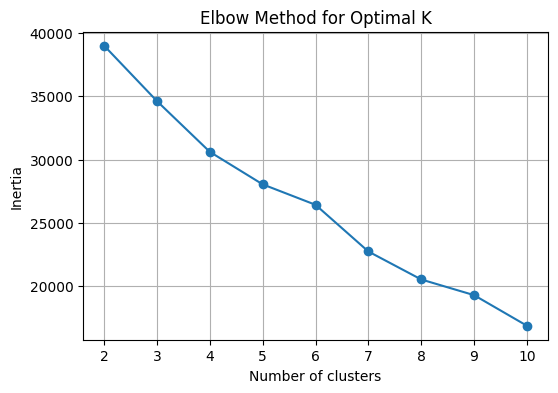

In [107]:
plt.figure(figsize=(6,4))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


**Fit final KMeans with optimal clusters**

In [94]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
df['KMeans_Cluster'] = kmeans_labels
kmeans_labels


array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

**Hierarchical Clustering**

In [95]:
linked = linkage(scaled_data, method='ward')
linked

array([[2.67700000e+03, 2.67800000e+03, 2.42276106e-03, 2.00000000e+00],
       [3.72500000e+03, 3.72700000e+03, 4.69073069e-03, 2.00000000e+00],
       [2.21400000e+03, 2.21900000e+03, 6.46339824e-03, 2.00000000e+00],
       ...,
       [7.97800000e+03, 7.99000000e+03, 8.50704361e+01, 1.88600000e+03],
       [7.98100000e+03, 7.99100000e+03, 8.89291977e+01, 2.11200000e+03],
       [7.99200000e+03, 7.99300000e+03, 1.16967320e+02, 3.99800000e+03]])

Plot Dendrogram

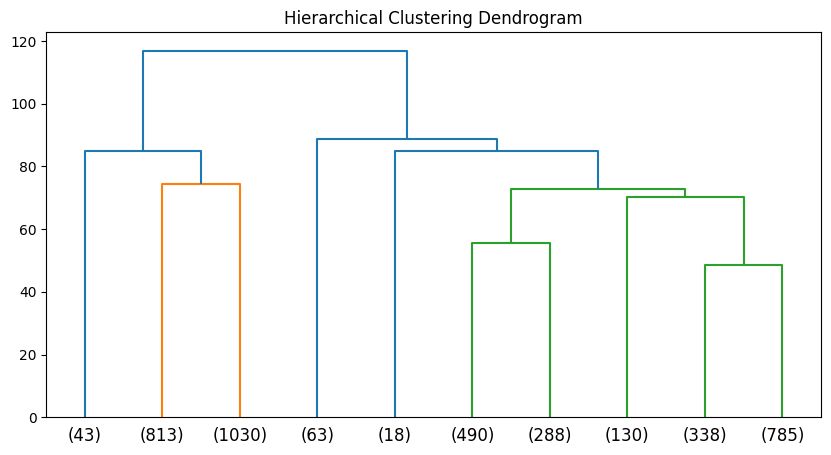

In [96]:
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='lastp', p=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.savefig("hierarchical_dendrogram.png")
plt.show()

**Assign clusters**

In [97]:
h_labels = fcluster(linked, 5, criterion='maxclust')
df['Hierarchical_Cluster'] = h_labels
h_labels

array([2, 2, 2, ..., 5, 2, 2], dtype=int32)

**DBSCAN Clustering**

In [98]:
db = DBSCAN(eps=2, min_samples=5)
db_labels = db.fit_predict(scaled_data)
df['DBSCAN_Cluster'] = db_labels
db_labels

array([0, 0, 0, ..., 1, 0, 0])

**Silhouette Scores**

In [99]:
km_score = silhouette_score(scaled_data, kmeans_labels)
print("Silhouette Score - KMeans:", round(km_score, 3))

Silhouette Score - KMeans: 0.239


In [100]:
if len(set(db_labels)) > 1:
    db_score = silhouette_score(scaled_data, db_labels)
    print("Silhouette Score - DBSCAN:", round(db_score, 3))
else:
    print("Silhouette Score - DBSCAN: Not applicable (single cluster detected)")

Silhouette Score - DBSCAN: 0.211


**PCA for Visualization**

In [102]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
pca_data

array([[-0.77524093, -1.87210483],
       [-0.54297875, -1.8702798 ],
       [-0.82981846, -1.88243526],
       ...,
       [-0.39141285,  0.97631354],
       [-2.19534098,  1.36740528],
       [-2.58081374,  1.06480552]])

**KMeans Cluster Visualization**

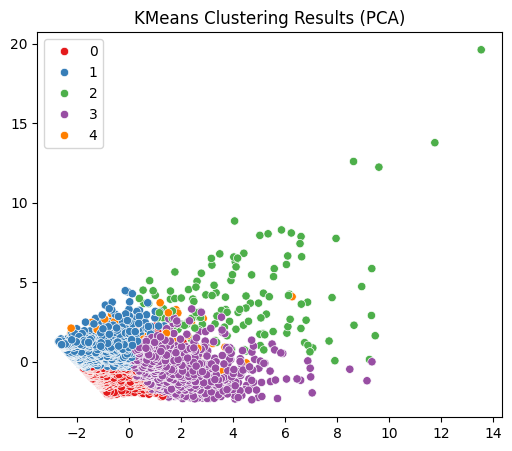

In [104]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans_labels, palette='Set1')
plt.title('KMeans Clustering Results (PCA)')
plt.show()

**Hierarchical Cluster Visualization**

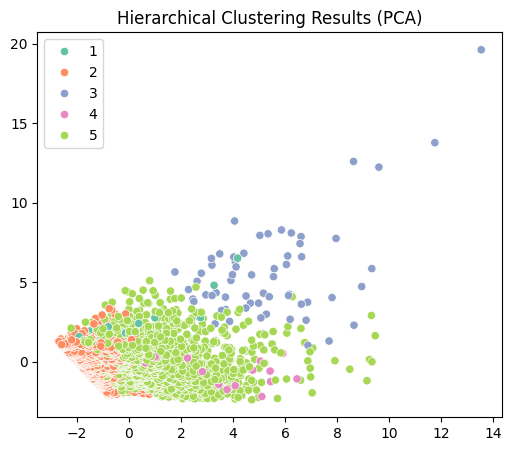

In [105]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=h_labels, palette='Set2')
plt.title('Hierarchical Clustering Results (PCA)')
plt.show()

**DBSCAN Cluster Visualization**

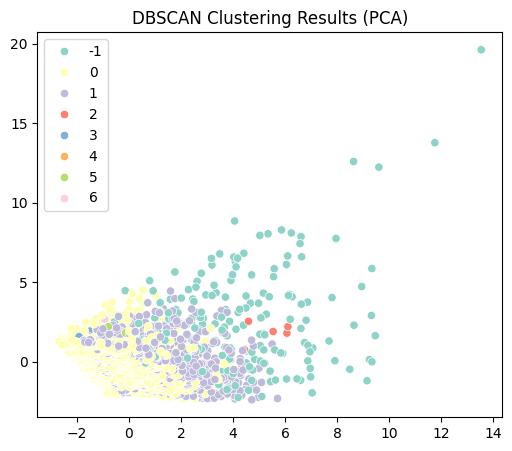

In [106]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=db_labels, palette='Set3')
plt.title('DBSCAN Clustering Results (PCA)')
plt.show()


**Conclusion**

1)K-Means is ideal when the number of clusters is known and data is evenly spread.

2)Hierarchical clustering gives good insight into data structure and relationships among clusters.

3)DBSCAN is helpful for detecting noise and arbitrarily shaped clusters but needs careful parameter tuning.